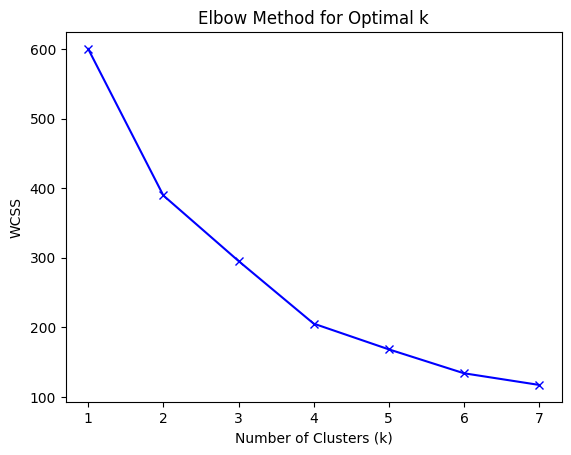

Silhouette Score: 0.41664341513732767


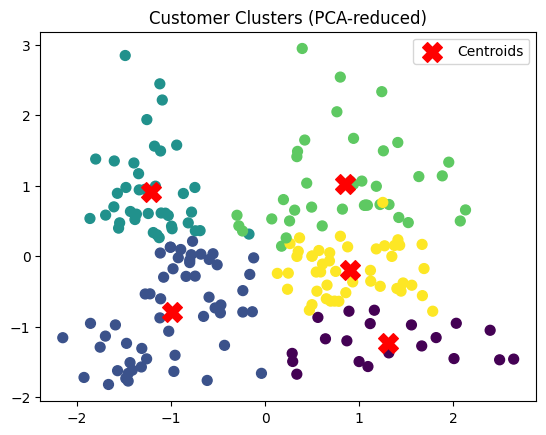

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


data = pd.read_csv("Mall_Customers.csv")
print(data.head())

# Use only numeric features
X = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional PCA for 2D view
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("Dataset PCA View (before clustering)")
plt.show()


wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


# Choose k=5 (typical for this dataset)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Visualize clusters in PCA-reduced space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=50)
centers_pca = pca.transform(kmeans.cluster_centers_)  # project centers to PCA space
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
            s=200, c="red", marker="X", label="Centroids")
plt.title("Customer Clusters (PCA 2D view)")
plt.legend()
plt.show()


sil_score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", sil_score)
